In [5]:
!pip install matplotlib
!pip install scipy

import pandas as pd
iucn_raw=pd.read_csv("IUCN_animals.csv")
amniote_raw=pd.read_csv("Amniote_Database_Aug_2015.csv")
#display (iucn_cleaned)


#IUCN data cleaning:

#Filtering for mammals
mammals="MAMMALIA"
is_mammal=iucn_raw["className"]==mammals
needed_columns=["scientificName","redlistCategory"]
iucn_mammal_data=iucn_raw[is_mammal]
#Renaming
iucn_data=iucn_mammal_data[needed_columns]
old_to_new={"scientificName":"IUCN Species Name","redlistCategory":"IUCN Status"}
iucn_data_renamed=iucn_data.rename(columns=old_to_new) 
#Removing data deficient category
is_not_DD=iucn_data_renamed["IUCN Status"]!="Data Deficient"
iucn_data_noDD=iucn_data_renamed[is_not_DD]
iucn_cleaned=iucn_data_noDD.convert_dtypes()
#Done!



#Amniote data cleaning:

#Filtering for mammals
mammal_amniote="Mammalia"
is_amniote_mammals=amniote_raw["class"]==mammal_amniote
needed_amniote_columns=["genus","species","litter_or_clutch_size_n","adult_body_mass_g"]
amniote_only_mammals=amniote_raw[is_amniote_mammals]
amniote_data=amniote_only_mammals[needed_amniote_columns]
#Renaming
old_to_new2={"litter_or_clutch_size_n":"Litter or Clutch size", "adult_body_mass_g":"Adult Body Mass (g)"}
amniote_renamed=amniote_data.rename(columns=old_to_new2)
amniote_renamed['Scientific Name'] = amniote_renamed[['genus', 'species']].agg(' '.join, axis=1)
#Changing units and removing NA values
amniote_converted=amniote_renamed.convert_dtypes()
amniote_kg=amniote_converted["Adult Body Mass (g)"]/1000
amniote_uncleaned=amniote_converted.replace(-999,pd.NA)
amniote_uncleaned["Adult Body Mass (kg)"]=amniote_kg
is_na1 = amniote_uncleaned['Adult Body Mass (g)'].isna()
is_na2 = amniote_uncleaned['Adult Body Mass (kg)'].isna()
is_na3= amniote_uncleaned['Litter or Clutch size'].isna()
amniote_1cleaned=amniote_uncleaned[~is_na1]
amniote_2cleaned=amniote_1cleaned[~is_na2]
amniote_cleaned=amniote_2cleaned[~is_na3]
#Done!

#Joining the data frames
joined=pd.merge(left=iucn_cleaned,right=amniote_cleaned, left_on="IUCN Species Name",right_on="Scientific Name")
#display(joined)


Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.3/30.3 MB 104.1 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


/var/folders/v_/pdgbclg573j4k8l8qg4cg5500000gn/T/ipykernel_58532/727671996.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amniote_2cleaned=amniote_1cleaned[~is_na2]
/var/folders/v_/pdgbclg573j4k8l8qg4cg5500000gn/T/ipykernel_58532/727671996.py:51: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  amniote_cleaned=amniote_2cleaned[~is_na3]


## Introduction




- Objective: Investigate the relationship between biological characteristics and conservation status of mammals using statistical data from the IUCN Red List and Amniote Database

- Approach: Focused on mammalian body mass and litter size by extracting and analyzing relevant columns

- Detailed cleaning of datasets and calculation of summary statistics 

- Implementation of histograms to visualize data distribution within each IUCN risk level

- Introduction of ANOVA to evaluate the association between biological attributes and extinction risk




## Background

- Extinction risk is a primary concern in biodiversity conversation

- Understanding how biological attributes correlate with extinction risk helps us plan effective conservation strategies

- Mammalian body mass: key ecological trait that impacts the ecological roles of species, its population dynamics and vulnerability to environmental alterations

- Litter size reflects reproductive strategies and life history traits that may affect species resilience to different environmental stressors

## Methods




Conducted an analysis combining the IUCN and Amniote datasets, focusing on mammals. In the IUCN data, we filtered to include only mammals, selected necessary columns, and excluded 'Data Deficient' entries. For the Amniote data, we filtered mammalian records, combined genus and species into a single 'Scientific Name' column, and converted body mass to kilograms. After merging the datasets, we calculated the mean adult body mass and litter size by IUCN risk categories. We then visualized these distributions using histograms to explore how physical traits correlate with conservation statuses.

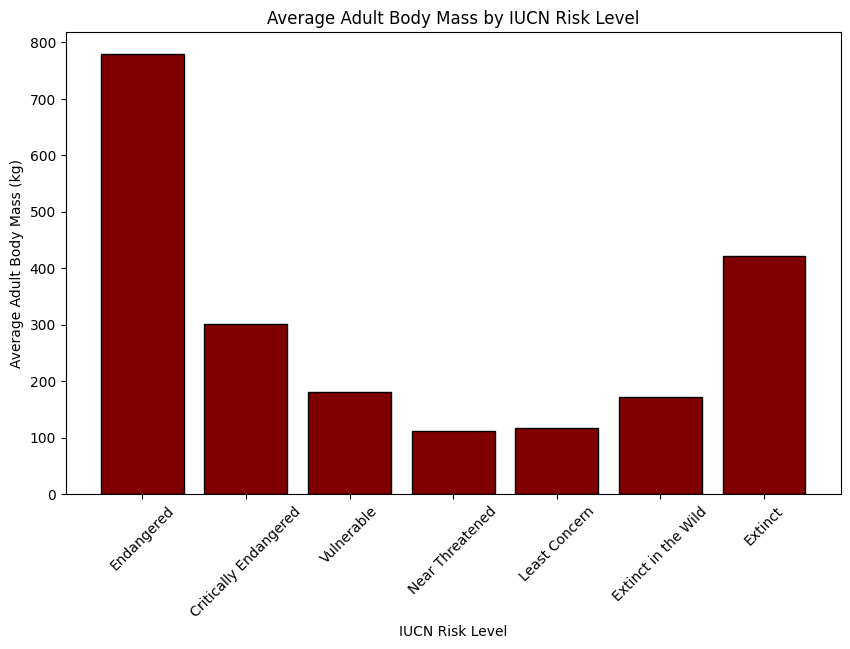

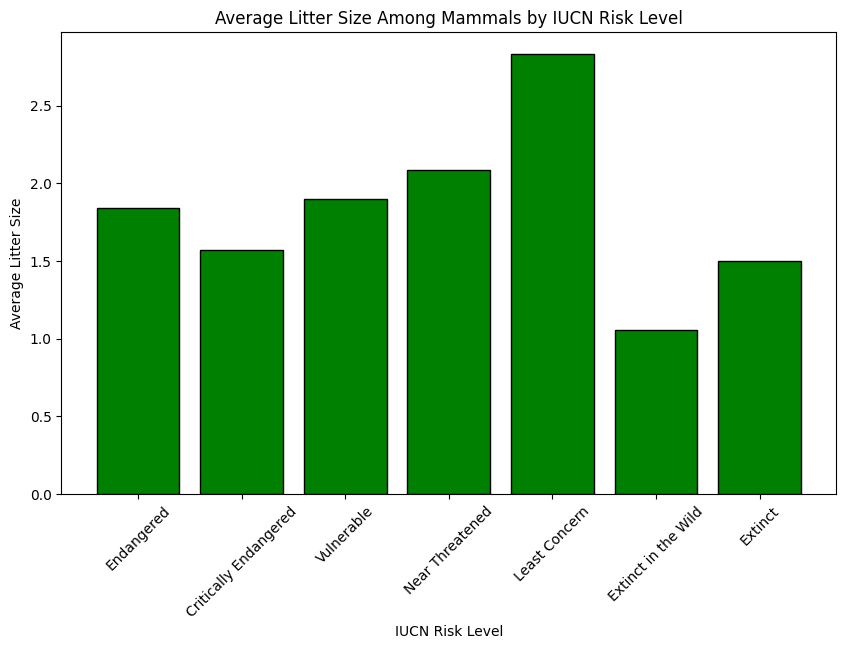

Summary Statistics for Average Body Mass by IUCN Risk Level:
                 count        mean          std      min       25%       50%  \
Threatened                                                                     
Non-Threatened  2267.0  118.893668  2029.264602  0.00198  0.021175   0.06942   
Threatened       663.0  439.437852  6158.597268  0.00233    0.1005  1.476205   

                    75%       max  
Threatened                         
Non-Threatened  0.80815   80000.0  
Threatened      9.44753  149000.0  


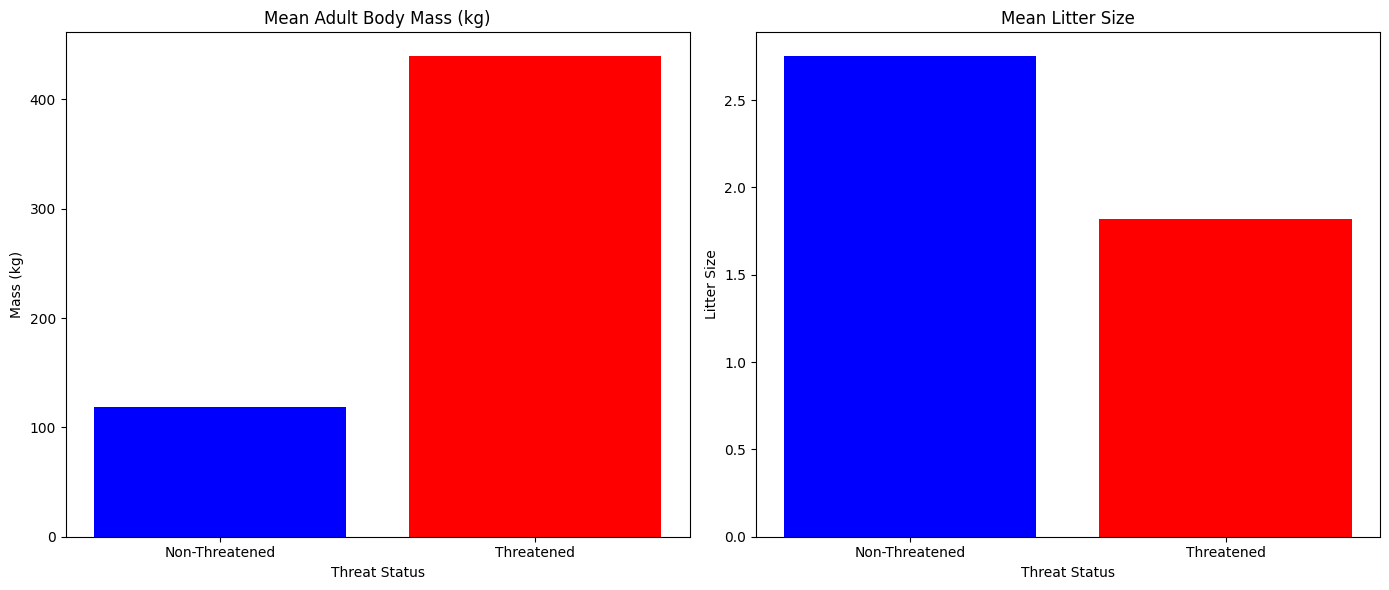

F-Statistic for Body Mass: 4.4810975784206235
P-Value for Body Mass: 0.03435583043269949
F-Statistic for Litter Size: 140.98371717354476
P-Value for Litter Size: 8.599698765105593e-32
Observed Difference for Body Mass: 320.5441840490252
Observed Difference for Litter Size: -0.929067658568975


In [6]:
#Computing mean adult body mass by IUCN risk level, boxplot can be made off this
mean_body_mass_by_IUCN_risk=joined.groupby("IUCN Status")["Adult Body Mass (kg)"].mean()
#display(mean_body_mass_by_IUCN_risk)

#Computing mean litter or clutch size by IUCN risk level, boxplot can be made off of this
mean_litter_or_clutch_size_by_IUCN_risk=joined.groupby("IUCN Status")["Litter or Clutch size"].mean()
#display(mean_litter_or_clutch_size_by_IUCN_risk)

import pandas as pd
import matplotlib.pyplot as plt


# Merge the cleaned dataframes
joined = pd.merge(left=iucn_cleaned, right=amniote_cleaned, left_on="IUCN Species Name", right_on="Scientific Name")

# Compute mean adult body mass by IUCN risk level
mean_body_mass_by_IUCN_risk = joined.groupby("IUCN Status")["Adult Body Mass (kg)"].mean()

import pandas as pd
import matplotlib.pyplot as plt


joined = pd.merge(left=iucn_cleaned, right=amniote_cleaned, left_on="IUCN Species Name", right_on="Scientific Name")

mean_body_mass_by_IUCN_risk = joined.groupby("IUCN Status")["Adult Body Mass (kg)"].mean()


import pandas as pd
import matplotlib.pyplot as plt

joined = pd.merge(left=iucn_cleaned, right=amniote_cleaned, left_on="IUCN Species Name", right_on="Scientific Name")

mean_body_mass_by_IUCN_risk = joined.groupby("IUCN Status")["Adult Body Mass (kg)"].mean()

# all IUCN risk levels and their labels
all_risk_levels = {
    "EN": "Endangered",
    "CR": "Critically Endangered",
    "VU": "Vulnerable",
    "NT": "Near Threatened",
    "LC": "Least Concern",
    "EW": "Extinct in the Wild",
    "EX": "Extinct"
}

mean_body_mass_values = []


for risk_level, label in all_risk_levels.items():
    mean_body_mass_values.append(mean_body_mass_by_IUCN_risk.get(label, 0))

# histogram for average adult body mass by IUCN risk level


threatened_status = ['Critically Endangered', 'Endangered', 'Vulnerable']
joined['Threatened'] = joined['IUCN Status'].apply(lambda x: 'Threatened' if x in threatened_status else 'Non-Threatened')


summary_stats_litter = joined.groupby('Threatened')['Litter or Clutch size'].describe()

#print("Summary Statistics for Litter Size by IUCN Risk Level:")
#print(summary_stats_lit


plt.figure(figsize=(10, 6))
plt.bar(all_risk_levels.values(), mean_body_mass_values, color="maroon", edgecolor="black")
plt.title("Average Adult Body Mass by IUCN Risk Level")
plt.xlabel("IUCN Risk Level")
plt.ylabel("Average Adult Body Mass (kg)")
plt.xticks(rotation=45) 


mean_litter_size_by_IUCN_risk = joined.groupby("IUCN Status")["Litter or Clutch size"].mean()

# all IUCN risk levels and their labels
all_risk_levels = {
    "EN": "Endangered",
    "CR": "Critically Endangered",
    "VU": "Vulnerable",
    "NT": "Near Threatened",
    "LC": "Least Concern",
    "EW": "Extinct in the Wild",
    "EX": "Extinct"
}


mean_litter_size_values = []


for risk_level, label in all_risk_levels.items():
    mean_litter_size_values.append(mean_litter_size_by_IUCN_risk.get(label, 0))

plt.figure(figsize=(10, 6))
plt.bar(all_risk_levels.values(), mean_litter_size_values, color="green", edgecolor="black")
plt.title("Average Litter Size Among Mammals by IUCN Risk Level")
plt.xlabel("IUCN Risk Level")
plt.ylabel("Average Litter Size")
plt.xticks(rotation=45) 
plt.show()

threatened_status = ['Critically Endangered', 'Endangered', 'Vulnerable']
joined['Threatened'] = joined['IUCN Status'].apply(lambda x: 'Threatened' if x in threatened_status else 'Non-Threatened')


summary_stats_body_mass = joined.groupby('Threatened')['Adult Body Mass (kg)'].describe()


print("Summary Statistics for Average Body Mass by IUCN Risk Level:")
print(summary_stats_body_mass)

# Classifying species as threatened or non-threatened
threatened_status = ['Critically Endangered', 'Endangered', 'Vulnerable']
joined['Threatened'] = joined['IUCN Status'].apply(lambda x: 'Threatened' if x in threatened_status else 'Non-Threatened')

# mean values
body_mass_data = joined.groupby('Threatened')['Adult Body Mass (kg)'].mean()
litter_size_data = joined.groupby('Threatened')['Litter or Clutch size'].mean()

# histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# for Mean Adult Body Mass
axes[0].bar(body_mass_data.index, body_mass_data.values, color=['blue', 'red'])
axes[0].set_title('Mean Adult Body Mass (kg)')
axes[0].set_ylabel('Mass (kg)')
axes[0].set_xlabel('Threat Status')

# for Mean Litter Size
axes[1].bar(litter_size_data.index, litter_size_data.values, color=['blue', 'red'])
axes[1].set_title('Mean Litter Size')
axes[1].set_ylabel('Litter Size')
axes[1].set_xlabel('Threat Status')

plt.tight_layout()
plt.show()


# Statistical approach (ANOVA)

from scipy.stats import f_oneway

threatened_group_body = joined[joined['Threatened'] == 'Threatened']['Adult Body Mass (kg)']
non_threatened_group_body = joined[joined['Threatened'] == 'Non-Threatened']['Adult Body Mass (kg)']

threatened_group_litter = joined[joined['Threatened'] == 'Threatened']['Litter or Clutch size']
non_threatened_group_litter = joined[joined['Threatened'] == 'Non-Threatened']['Litter or Clutch size']


f_statistic_body, p_value_body = f_oneway(threatened_group_body, non_threatened_group_body)

f_statistic_litter, p_value_litter = f_oneway(threatened_group_litter, non_threatened_group_litter)

print("F-Statistic for Body Mass:", f_statistic_body)
print("P-Value for Body Mass:", p_value_body)
print("F-Statistic for Litter Size:", f_statistic_litter)
print("P-Value for Litter Size:", p_value_litter)



mean_threatened_body = threatened_group_body.mean()
mean_non_threatened_body = non_threatened_group_body.mean()

mean_threatened_litter = threatened_group_litter.mean()
mean_non_threatened_litter = non_threatened_group_litter.mean()

# the observed differences
observed_difference_body = mean_threatened_body - mean_non_threatened_body
observed_difference_litter = mean_threatened_litter - mean_non_threatened_litter

print("Observed Difference for Body Mass:", observed_difference_body)
print("Observed Difference for Litter Size:", observed_difference_litter)

## Results

(Descriptive statistics)

 Average Adult Body Mass by IUCN level:
- Endangered and extinct species exhibit the highest average body mass relative to species in Vulnerable,' 'Near Threatened,' and 'Least Concern’ categories. 

- Figure 1: Distribution of Average Mammalian Body Mass Across IUCN Risk Levels

- Table 1: Summary Statistics of Litter Size by IUCN Risk Level


Summary Statistics for Litter Size by IUCN Risk Level:
                 count      mean       std   min  25%   50%    75%    max
Threatened                                                               
Non-Threatened  2267.0  2.750659   1.87747  0.95  1.0  2.28  3.855  16.89
Threatened       663.0  1.821591  1.351116   0.9  1.0  1.01    2.2  10.08


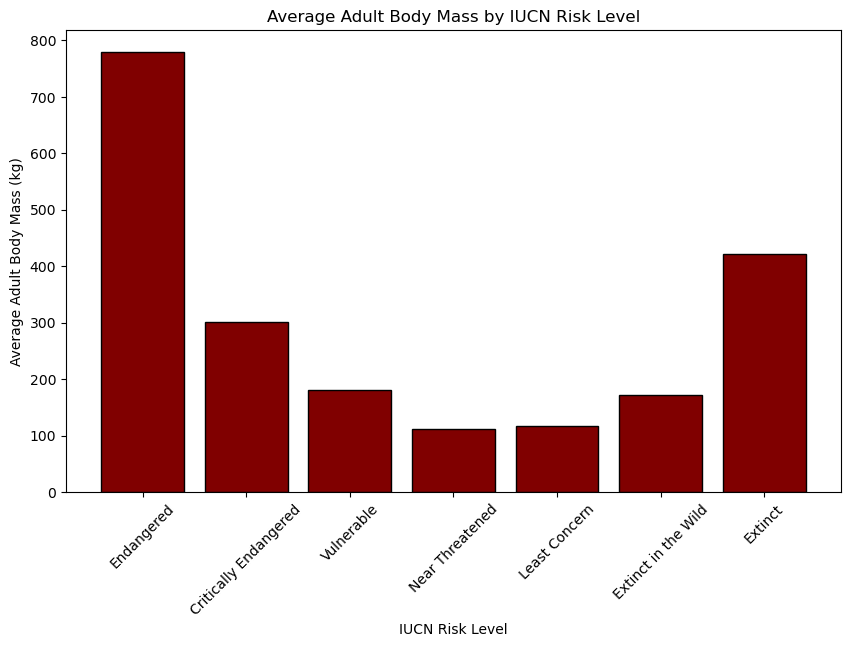

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(all_risk_levels.values(), mean_body_mass_values, color="maroon", edgecolor="black")
plt.title("Average Adult Body Mass by IUCN Risk Level")
plt.xlabel("IUCN Risk Level")
plt.ylabel("Average Adult Body Mass (kg)")
plt.xticks(rotation=45) 
print("Summary Statistics for Litter Size by IUCN Risk Level:")
print(summary_stats_litter)


Litter Size by IUCN level: 
- Mammals in the Least concern category exhibit larger litter sizes, while those listed in the higher risk categories show relatively smaller litter sizes. 

- Figure 2: Distribution of Litter Size Across IUCN Risk Levels in Mammals 

- Table 2: Summary Statistics of Average Body Mass by IUCN Risk Level


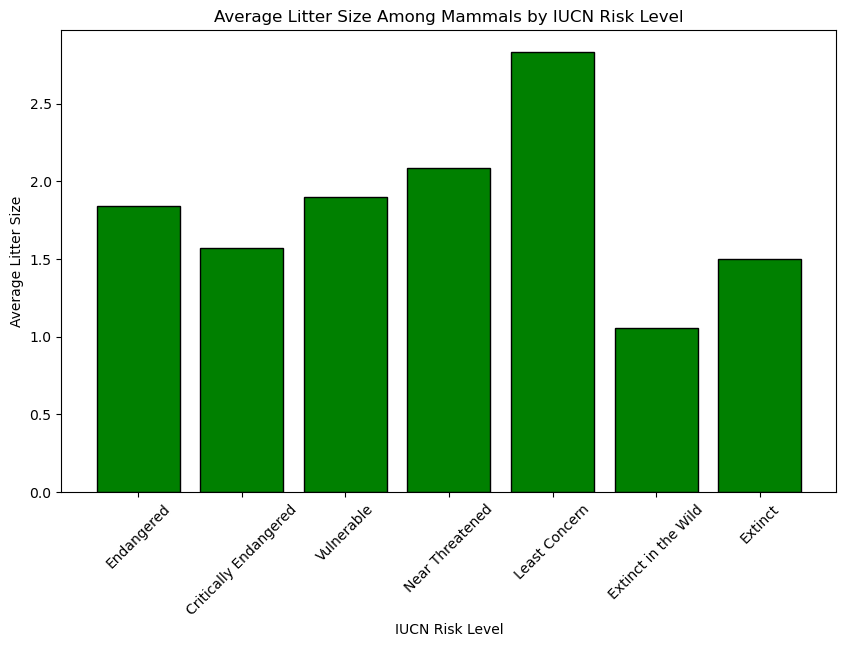

Summary Statistics for Average Body Mass by IUCN Risk Level:
                 count        mean          std      min       25%       50%  \
Threatened                                                                     
Non-Threatened  2267.0  118.893668  2029.264602  0.00198  0.021175   0.06942   
Threatened       663.0  439.437852  6158.597268  0.00233    0.1005  1.476205   

                    75%       max  
Threatened                         
Non-Threatened  0.80815   80000.0  
Threatened      9.44753  149000.0  


In [30]:
plt.figure(figsize=(10, 6))
plt.bar(all_risk_levels.values(), mean_litter_size_values, color="green", edgecolor="black")
plt.title("Average Litter Size Among Mammals by IUCN Risk Level")
plt.xlabel("IUCN Risk Level")
plt.ylabel("Average Litter Size")
plt.xticks(rotation=45) 
plt.show()

print("Summary Statistics for Average Body Mass by IUCN Risk Level:")
print(summary_stats_body_mass)

(Inferential  statistics)

Average body Mass for threatened vs non threatened species:

- The blue bar represents non-threatened species, and it has a much lower value compared to the red bar, which represents threatened species. 
- Threatened species have a higher body mass than non-threatened species.

Figure 3: Mean Adult Body Mass Comparison for Threatened vs Non Threatened Species

Litter size for threatened vs non threatened species:

- Non-threatened species (blue bar) has a larger value than the threatened species (red bar) 
- Non-threatened species have a higher mean litter size compared to threatened species.

Figure 4: Mean Litter Size Comparison for Threatened vs Non Threatened Species

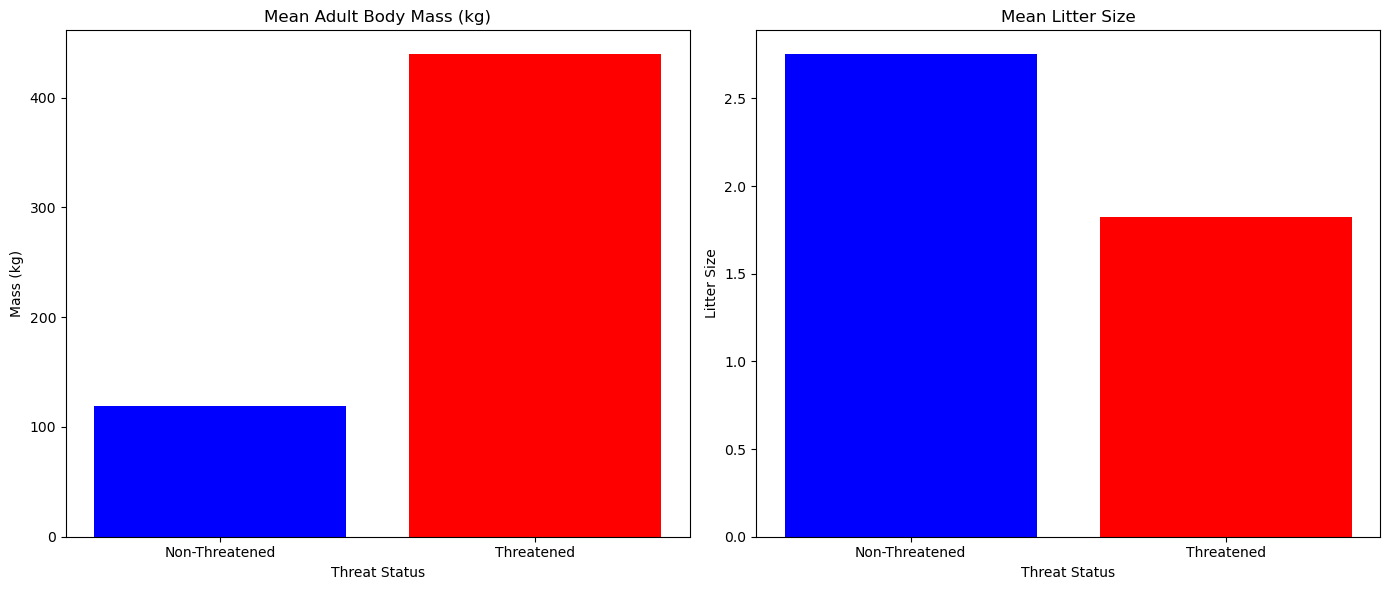

In [31]:
# histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# for Mean Adult Body Mass
axes[0].bar(body_mass_data.index, body_mass_data.values, color=['blue', 'red'])
axes[0].set_title('Mean Adult Body Mass (kg)')
axes[0].set_ylabel('Mass (kg)')
axes[0].set_xlabel('Threat Status')

# for Mean Litter Size
axes[1].bar(litter_size_data.index, litter_size_data.values, color=['blue', 'red'])
axes[1].set_title('Mean Litter Size')
axes[1].set_ylabel('Litter Size')
axes[1].set_xlabel('Threat Status')

plt.tight_layout()
plt.show()

## Conclusion





- Investigated the relationship between IUCN risk levels and two key mammalian traits: body mass and litter size.
- Found notable trends in body mass across risk categories, with the largest average masses in the Endangered and Extinct categories.
- Observed that Near Threatened species tend to have larger litter sizes, possibly as a reproductive adaptive strategy.
- Suggests a potential correlation between larger body mass and higher extinction risk.
- Larger litter sizes in Near Threatened species could indicate an evolutionary response to survival pressures.



Limitations, Challenges, and Strength

- Limited by data availability and potential reporting biases within the IUCN and Amniote databases.
- Variability within risk categories and across species not fully accounted for.
(Add challenges )
Project Strengths:
- Utilized robust statistical methods to process and analyze a large dataset.
- Effective data visualization techniques provided clear communication of complex trends.

Areas for Improvement:
- Incorporate additional biological and ecological variables.
- A longtitudinal study will reveal trends over time, revealing deeper insights into the conservation status dynamics.
